Team Members

*   Libin Kutty - Group 2
*   Ritu Gahir - Group 3
*   Viju Sudhi - Group 10

In [1]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
import os
print(os.getcwd())
os.chdir("/content/drive/My Drive/Colab Notebook/IDL/")
print(os.getcwd())

/content
/content/drive/My Drive/Colab Notebook/IDL


In [6]:
def model():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), input_shape=(32,32,3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

  model.add(Dense(64))
  #model.add(Activation('relu'))

  model.add(Dense(10))
  model.add(Activation('softmax'))

  return model

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_data=(x_val,y_val),
        callbacks=[tensorboard])

# Data 1
Training accuracy - 84%
Validation accuracy -77%
Test Accuracy - 60%

Problems with dataset

* There are 2 unseen class labels in test set 

* The number of instances in train set are around 36k , validate set with 5k and test set with 10k



In [ ]:
ds1 = np.load('data1.npz')
print(ds1.files)
train_imgs = ds1['train_imgs']
train_lbls = ds1['train_lbls']
val_imgs = ds1['val_imgs']
val_lbls = ds1['val_lbls']
test_imgs = ds1['test_imgs']
test_lbls = ds1['test_lbls']

In [ ]:
train_lbls

array([6, 9, 9, ..., 1, 5, 6], dtype=int32)

In [ ]:
check1 = model()

In [ ]:
check1.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

check1.fit(train_imgs, train_lbls, epochs=10, validation_data=(val_imgs,val_lbls))

Epoch 1/10
1126/1126 [==============================] - 55s 49ms/step - loss: 1.3311 - accuracy: 0.4953 - val_loss: 1.0611 - val_accuracy: 0.6114
Epoch 2/10
1126/1126 [==============================] - 51s 45ms/step - loss: 0.9836 - accuracy: 0.6447 - val_loss: 0.8777 - val_accuracy: 0.6827
Epoch 3/10
1126/1126 [==============================] - 51s 45ms/step - loss: 0.8218 - accuracy: 0.7053 - val_loss: 0.7844 - val_accuracy: 0.7327
Epoch 4/10
1126/1126 [==============================] - 52s 46ms/step - loss: 0.7313 - accuracy: 0.7401 - val_loss: 0.7275 - val_accuracy: 0.7455
Epoch 5/10
1126/1126 [==============================] - 52s 46ms/step - loss: 0.6667 - accuracy: 0.7658 - val_loss: 0.6887 - val_accuracy: 0.7633
Epoch 6/10
1126/1126 [==============================] - 52s 47ms/step - loss: 0.6042 - accuracy: 0.7874 - val_loss: 0.7250 - val_accuracy: 0.7445
Epoch 7/10
1126/1126 [==============================] - 51s 46ms/step - loss: 0.5474 - accuracy: 0.8070 - val_loss: 0.6706 -

In [ ]:
pred1 = check1.predict_classes(test_imgs)
print("Predicted Label:",pred1)                                                                
print("Actual Label:",test_lbls)

print("Accuracy Score:",accuracy_score(test_lbls, pred1))

Predicted Label: [5 8 8 ... 5 1 4]
Actual Label: [3 8 8 ... 5 1 7]
Accuracy Score: 0.6024


In [ ]:
print(np.unique(train_lbls))
print(np.unique(val_lbls))
print(np.unique(test_lbls))

[0 1 2 4 5 6 8 9]
[0 1 2 4 5 6 8 9]
[0 1 2 3 4 5 6 7 8 9]


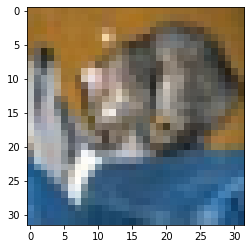

In [ ]:
plt.imshow(test_imgs[0])

In [ ]:
print(train_imgs.shape)
print(val_imgs.shape)
print(test_imgs.shape)

(36004, 32, 32, 3)
(3996, 32, 32, 3)
(10000, 32, 32, 3)


# Data 2
Training accuracy - 77%
Validation accuracy -80%
Test Accuracy - 70%

Problems with dataset

*   Train set contains 50k instances , validate contains 5k instances and test contains 10k instances - Extra data in train set



In [ ]:
check2 = model()

ds2 = np.load('data2.npz')
print(ds2.files)
train_imgs2 = ds2['train_imgs']
train_lbls2 = ds2['train_lbls']
val_imgs2 = ds2['val_imgs']
val_lbls2 = ds2['val_lbls']
test_imgs2 = ds2['test_imgs']
test_lbls2 = ds2['test_lbls']

['train_imgs', 'train_lbls', 'val_imgs', 'val_lbls', 'test_imgs', 'test_lbls']


In [ ]:
train_lbls2

array([6, 9, 9, ..., 9, 1, 1], dtype=int32)

In [ ]:
check2.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

check2.fit(train_imgs2, train_lbls2, batch_size=128, epochs=10, validation_data=(val_imgs2,val_lbls2))

Epoch 1/10
391/391 [==============================] - 63s 160ms/step - loss: 1.6137 - accuracy: 0.4135 - val_loss: 1.3848 - val_accuracy: 0.4940
Epoch 2/10
391/391 [==============================] - 62s 160ms/step - loss: 1.2419 - accuracy: 0.5597 - val_loss: 1.2385 - val_accuracy: 0.5698
Epoch 3/10
391/391 [==============================] - 62s 158ms/step - loss: 1.0870 - accuracy: 0.6198 - val_loss: 0.9876 - val_accuracy: 0.6608
Epoch 4/10
391/391 [==============================] - 62s 160ms/step - loss: 0.9774 - accuracy: 0.6594 - val_loss: 0.8706 - val_accuracy: 0.6982
Epoch 5/10
391/391 [==============================] - 63s 161ms/step - loss: 0.9037 - accuracy: 0.6849 - val_loss: 0.8530 - val_accuracy: 0.7084
Epoch 6/10
391/391 [==============================] - 63s 160ms/step - loss: 0.8366 - accuracy: 0.7108 - val_loss: 0.7437 - val_accuracy: 0.7418
Epoch 7/10
391/391 [==============================] - 62s 159ms/step - loss: 0.7856 - accuracy: 0.7282 - val_loss: 0.7065 - val_ac

In [ ]:
pred2 = check2.predict_classes(test_imgs2)
print("Predicted Label:",pred2)                                                                
print("Actual Label:",test_lbls2)

print("Accuracy Score:",accuracy_score(test_lbls2, pred2))

Predicted Label: [3 8 1 ... 5 1 7]
Actual Label: [3 8 8 ... 5 1 7]
Accuracy Score: 0.7067


In [ ]:
print(np.unique(train_lbls2))
print(np.unique(val_lbls2))
print(np.unique(test_lbls2))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


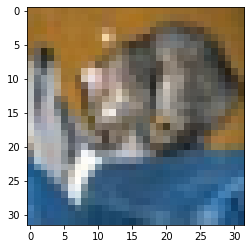

In [ ]:
plt.imshow(test_imgs2[0])

In [ ]:
print(train_imgs2.shape)
print(val_imgs2.shape)
print(test_imgs2.shape)

(50000, 32, 32, 3)
(5000, 32, 32, 3)
(10000, 32, 32, 3)


# Data 3
Training accuracy - 77%
Validation accuracy -72%
Test Accuracy - 53%

Problems with dataset

*   Value of pixel is below 0(in negative), it should be 0-1 or 0-255 


In [ ]:
check3 = model()

ds3 = np.load('data3.npz')
print(ds3.files)
train_imgs3 = ds3['train_imgs']
train_lbls3 = ds3['train_lbls']
val_imgs3 = ds3['val_imgs']
val_lbls3 = ds3['val_lbls']
test_imgs3 = ds3['test_imgs']
test_lbls3 = ds3['test_lbls']

['train_imgs', 'train_lbls', 'val_imgs', 'val_lbls', 'test_imgs', 'test_lbls']


In [ ]:
check3.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

check3.fit(train_imgs3, train_lbls3, batch_size=128, epochs=10, validation_data=(val_imgs3,val_lbls3))

Epoch 1/10
352/352 [==============================] - 56s 159ms/step - loss: 1.6203 - accuracy: 0.4141 - val_loss: 1.3167 - val_accuracy: 0.5324
Epoch 2/10
352/352 [==============================] - 56s 158ms/step - loss: 1.2541 - accuracy: 0.5544 - val_loss: 1.1300 - val_accuracy: 0.6082
Epoch 3/10
352/352 [==============================] - 56s 159ms/step - loss: 1.0973 - accuracy: 0.6155 - val_loss: 1.0665 - val_accuracy: 0.6232
Epoch 4/10
352/352 [==============================] - 57s 162ms/step - loss: 0.9968 - accuracy: 0.6507 - val_loss: 0.9615 - val_accuracy: 0.6670
Epoch 5/10
352/352 [==============================] - 57s 161ms/step - loss: 0.9063 - accuracy: 0.6872 - val_loss: 0.9263 - val_accuracy: 0.6810
Epoch 6/10
352/352 [==============================] - 57s 161ms/step - loss: 0.8372 - accuracy: 0.7086 - val_loss: 0.8864 - val_accuracy: 0.6942
Epoch 7/10
352/352 [==============================] - 57s 161ms/step - loss: 0.7835 - accuracy: 0.7287 - val_loss: 0.8404 - val_ac

In [ ]:
pred3 = check3.predict_classes(test_imgs3, batch_size=128)
print("Predicted Label:",pred3)                                                                
print("Actual Label:",test_lbls3)

print("Accuracy Score:",accuracy_score(test_lbls3, pred3))

Predicted Label: [5 1 1 ... 7 1 7]
Actual Label: [3 8 8 ... 5 1 7]
Accuracy Score: 0.5314


In [ ]:
print(np.unique(train_lbls3))
print(np.unique(val_lbls3))
print(np.unique(test_lbls3))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
test_imgs3[0]

array([[[ 0.23921573, -0.12156862, -0.6156863 ],
        [ 0.24705887, -0.12941176, -0.6313726 ],
        [ 0.2941177 , -0.09019607, -0.6       ],
        ...,
        [ 0.07450986, -0.25490195, -0.7176471 ],
        [-0.01176471, -0.2862745 , -0.7176471 ],
        [-0.09019607, -0.3333333 , -0.7411765 ]],

       [[ 0.19215691, -0.12156862, -0.6       ],
        [ 0.18431377, -0.1372549 , -0.6862745 ],
        [ 0.24705887, -0.10588235, -0.64705884],
        ...,
        [ 0.06666672, -0.25490195, -0.75686276],
        [-0.01960784, -0.2862745 , -0.7490196 ],
        [-0.06666666, -0.3098039 , -0.73333335]],

       [[ 0.18431377, -0.1372549 , -0.6313726 ],
        [ 0.18431377, -0.14509803, -0.7411765 ],
        [ 0.23921573, -0.12941176, -0.7176471 ],
        ...,
        [ 0.09019613, -0.23137254, -0.73333335],
        [ 0.0196079 , -0.25490195, -0.73333335],
        [-0.05882353, -0.30196077, -0.7411765 ]],

       ...,

       [[-0.46666664, -0.02745098,  0.38823533],
        [-0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


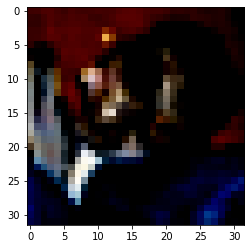

In [ ]:
plt.imshow(test_imgs3[0])

In [ ]:
print(train_imgs3.shape)
print(val_imgs3.shape)
print(test_imgs3.shape)

(45000, 32, 32, 3)
(5000, 32, 32, 3)
(10000, 32, 32, 3)


# Data 4
Training accuracy - 100%
Validation accuracy -100%
Test Accuracy - 14%

Problems with dataset

*   Repetitive data present in training data

*   Overfitting




In [ ]:
check4 = model()

ds4 = np.load('data4.npz')
print(ds4.files)
train_imgs4 = ds4['train_imgs']
train_lbls4 = ds4['train_lbls']
val_imgs4 = ds4['val_imgs']
val_lbls4 = ds4['val_lbls']
test_imgs4 = ds4['test_imgs']
test_lbls4 = ds4['test_lbls']

['train_imgs', 'train_lbls', 'val_imgs', 'val_lbls', 'test_imgs', 'test_lbls']


In [ ]:
check4.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

check4.fit(train_imgs4, train_lbls4, batch_size=128, epochs=10, validation_data=(val_imgs4,val_lbls4))

Epoch 1/10
352/352 [==============================] - 57s 162ms/step - loss: 0.0805 - accuracy: 0.9797 - val_loss: 3.7335e-05 - val_accuracy: 1.0000
Epoch 2/10
352/352 [==============================] - 56s 160ms/step - loss: 2.3440e-05 - accuracy: 1.0000 - val_loss: 1.4555e-05 - val_accuracy: 1.0000
Epoch 3/10
352/352 [==============================] - 57s 161ms/step - loss: 1.0485e-05 - accuracy: 1.0000 - val_loss: 7.4863e-06 - val_accuracy: 1.0000
Epoch 4/10
352/352 [==============================] - 57s 161ms/step - loss: 5.7974e-06 - accuracy: 1.0000 - val_loss: 4.4346e-06 - val_accuracy: 1.0000
Epoch 5/10
352/352 [==============================] - 57s 162ms/step - loss: 3.5875e-06 - accuracy: 1.0000 - val_loss: 2.8849e-06 - val_accuracy: 1.0000
Epoch 6/10
352/352 [==============================] - 57s 162ms/step - loss: 2.4048e-06 - accuracy: 1.0000 - val_loss: 1.9908e-06 - val_accuracy: 1.0000
Epoch 7/10
352/352 [==============================] - 57s 162ms/step - loss: 1.6985e-0

In [ ]:
pred4 = check4.predict_classes(test_imgs4, batch_size=128)
print("Predicted Label:",pred4)                                                                
print("Actual Label:",test_lbls4)

print("Accuracy Score:",accuracy_score(test_lbls4, pred4))

Predicted Label: [2 9 9 ... 5 4 2]
Actual Label: [3 8 8 ... 5 1 7]
Accuracy Score: 0.1459


In [ ]:
print(np.unique(train_lbls4))
print(np.unique(val_lbls4))
print(np.unique(test_lbls4))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


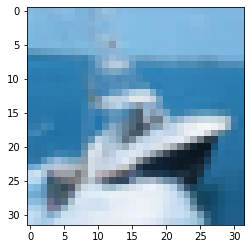

In [ ]:
plt.imshow(train_imgs4[0])

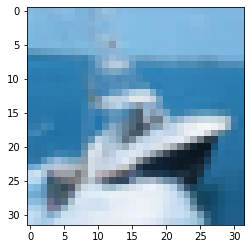

In [ ]:
plt.imshow(train_imgs4[1])

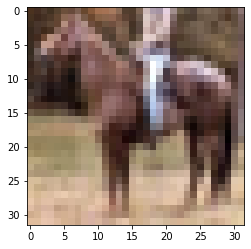

In [ ]:
plt.imshow(val_imgs2[0])

In [ ]:
print(train_imgs4.shape)
print(val_imgs4.shape)
print(test_imgs4.shape)

(45000, 32, 32, 3)
(5000, 32, 32, 3)
(10000, 32, 32, 3)


# Data Augmentation

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
cifar = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [11]:
test_images.shape

(10000, 32, 32, 3)

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=5000)

In [15]:
x_train.shape

(45000, 32, 32, 3)

In [23]:
wo_aug = model()

In [24]:
wo_aug.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

wo_aug.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_val,y_val))

Epoch 1/10
352/352 [==============================] - 55s 155ms/step - loss: 4.1647 - accuracy: 0.3358 - val_loss: 1.5736 - val_accuracy: 0.4266
Epoch 2/10
352/352 [==============================] - 55s 155ms/step - loss: 1.4818 - accuracy: 0.4709 - val_loss: 1.4122 - val_accuracy: 0.4932
Epoch 3/10
352/352 [==============================] - 55s 155ms/step - loss: 1.3684 - accuracy: 0.5139 - val_loss: 1.3341 - val_accuracy: 0.5294
Epoch 4/10
352/352 [==============================] - 55s 155ms/step - loss: 1.2856 - accuracy: 0.5462 - val_loss: 1.2877 - val_accuracy: 0.5454
Epoch 5/10
352/352 [==============================] - 54s 155ms/step - loss: 1.2212 - accuracy: 0.5718 - val_loss: 1.2512 - val_accuracy: 0.5550
Epoch 6/10
352/352 [==============================] - 55s 156ms/step - loss: 1.1507 - accuracy: 0.5959 - val_loss: 1.3091 - val_accuracy: 0.5524
Epoch 7/10
352/352 [==============================] - 54s 154ms/step - loss: 1.1022 - accuracy: 0.6139 - val_loss: 1.1904 - val_ac

In [25]:
pred_wo = wo_aug.predict_classes(test_images, batch_size=128)
print("Predicted Label:",pred_wo)                                                                
print("Actual Label:",test_labels)

print("Accuracy Score:",accuracy_score(test_labels, pred_wo))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Predicted Label: [8 8 8 ... 5 4 7]
Actual Label: [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]
Accuracy Score: 0.5814


In [33]:
with_aug = model()

In [34]:
with_aug.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

# Fit the model on the batches generated by datagen.flow().
with_aug.fit_generator(datagen.flow(x_train, y_train,
                                  batch_size=128),
                    epochs=10,
                    validation_data=(x_val, y_val))

Epoch 1/10
352/352 [==============================] - 72s 204ms/step - loss: 3.9324 - accuracy: 0.1108 - val_loss: 1.7519 - val_accuracy: 0.0410
Epoch 2/10
352/352 [==============================] - 72s 204ms/step - loss: 1.6569 - accuracy: 0.1053 - val_loss: 1.5408 - val_accuracy: 0.0830
Epoch 3/10
352/352 [==============================] - 72s 203ms/step - loss: 1.5204 - accuracy: 0.1000 - val_loss: 1.4123 - val_accuracy: 0.0670
Epoch 4/10
352/352 [==============================] - 71s 202ms/step - loss: 1.4444 - accuracy: 0.0980 - val_loss: 1.3236 - val_accuracy: 0.0712
Epoch 5/10
352/352 [==============================] - 71s 201ms/step - loss: 1.3822 - accuracy: 0.0980 - val_loss: 1.3394 - val_accuracy: 0.1408
Epoch 6/10
352/352 [==============================] - 73s 206ms/step - loss: 1.3349 - accuracy: 0.0981 - val_loss: 1.2947 - val_accuracy: 0.1074
Epoch 7/10
352/352 [==============================] - 73s 207ms/step - loss: 1.2956 - accuracy: 0.0972 - val_loss: 1.2564 - val_ac

In [32]:
datagen1 = ImageDataGenerator(
    #featurewise_center=True,
    #featurewise_std_normalization=True,
    rotation_range=20,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    horizontal_flip=True)

datagen1.fit(x_train)
# fits the model on batches with real-time data augmentation:
with_aug.fit_generator(datagen1.flow(x_train, y_train, batch_size=32),
                    steps_per_epoch=len(x_train) / 32, epochs=10)

Epoch 1/10
1407/1406 [==============================] - 79s 56ms/step - loss: 1.8622 - accuracy: 0.0988
Epoch 2/10
1407/1406 [==============================] - 77s 55ms/step - loss: 1.4527 - accuracy: 0.0953
Epoch 3/10
1407/1406 [==============================] - 77s 55ms/step - loss: 1.3704 - accuracy: 0.0961
Epoch 4/10
1407/1406 [==============================] - 77s 55ms/step - loss: 1.3051 - accuracy: 0.0959
Epoch 5/10
1407/1406 [==============================] - 77s 55ms/step - loss: 1.2509 - accuracy: 0.0965
Epoch 6/10
1407/1406 [==============================] - 77s 55ms/step - loss: 1.2006 - accuracy: 0.0973
Epoch 7/10
1407/1406 [==============================] - 77s 55ms/step - loss: 1.1533 - accuracy: 0.0973
Epoch 8/10
1407/1406 [==============================] - 77s 55ms/step - loss: 1.1135 - accuracy: 0.0974
Epoch 9/10
1407/1406 [==============================] - 79s 56ms/step - loss: 1.0852 - accuracy: 0.0971
Epoch 10/10
1407/1406 [==============================] - 77s 55m